In [6]:
import numpy as np
import matplotlib.pyplot as plt
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *
import FinDates as FinDate

ModuleNotFoundError: No module named 'FinDates'

### Up and Out Call Option Deal Specification

In [5]:
valueDate = FinDate(1, 9, 2020)
expiryDate = valueDate.addYears(0.5)
strikePrice = 100
barrierType = FinEquityBarrierTypes.UP_AND_OUT_CALL
barrierPrice = 130
numObservationsPerYear = 252
barrierOptUOC = FinEquityBarrierOption(expiryDate, strikePrice, barrierType, barrierPrice, numObservationsPerYear)

NameError: name 'FinDate' is not defined

### Market Data

In [3]:
stockPrice = 100
dividendYield = 0.00
interestRate = 0.00
volatility = 0.20
discountCurve = FinDiscountCurveFlat(valueDate, interestRate, FinFrequencyTypes.CONTINUOUS)

### Model

In [3]:
model = FinEquityModelBlackScholes(volatility)

NameError: name 'FinEquityModelBlackScholes' is not defined

### Pricing

In [5]:
barrierOptUOC.value(valueDate, stockPrice, discountCurve, dividendYield, model)

4.114735116264635

### Up and out call option with different spot price

In [5]:
stockPrices = np.linspace(30,130,40)
values = barrierOptUOC.value(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, values, 'b-x')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

NameError: name 'model' is not defined

Text(0, 0.5, 'Option Delta')

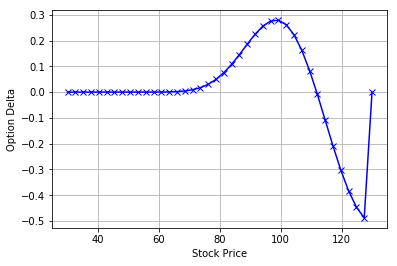

In [7]:
deltas = barrierOptUOC.delta(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, deltas, 'b-x')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Delta")

Text(0, 0.5, 'Option Vega')

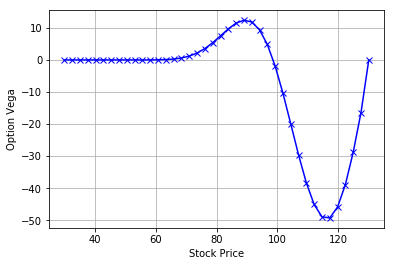

In [8]:
vegas = barrierOptUOC.vega(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, vegas, 'b-x')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Vega")

### Up and In Call Option Deal Specification

In [9]:
barrierType = FinEquityBarrierTypes.UP_AND_IN_CALL
barrierOptUIC = FinEquityBarrierOption(expiryDate, strikePrice, barrierType, barrierPrice, numObservationsPerYear)

### In Out Parity

In [10]:
uic = barrierOptUIC.value(valueDate, stockPrice, discountCurve, dividendYield, model)
uoc = barrierOptUOC.value(valueDate, stockPrice, discountCurve, dividendYield, model) 
uic + uoc

5.614021840862264

### Up and in call option with different spot price

Text(0, 0.5, 'Option Premium')

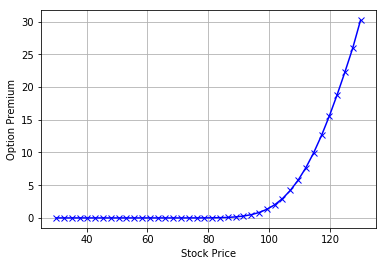

In [11]:
stockPrices = np.linspace(30,130,40)
values = barrierOptUIC.value(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, values, 'b-x')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

Text(0, 0.5, 'Option Delta')

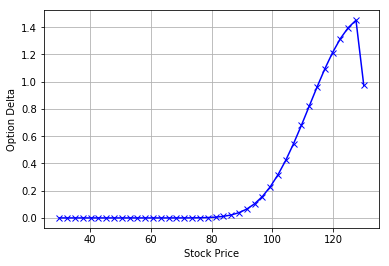

In [12]:
deltas = barrierOptUIC.delta(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, deltas, 'b-x')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Delta")

Text(0, 0.5, 'Option Vega')

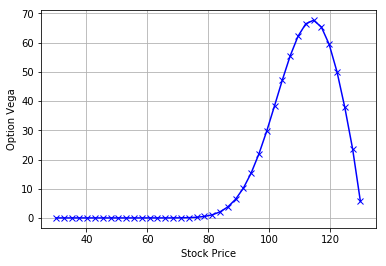

In [13]:
vegas = barrierOptUIC.vega(valueDate, stockPrices, discountCurve, dividendYield, model)
plt.plot(stockPrices, vegas, 'b-x')
plt.grid(linestyle='-')
plt.xlabel("Stock Price")
plt.ylabel("Option Vega")